### Module 4: BackTesting

In [246]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics

### Loading the Predicted Price

In [247]:
ABOT = pd.read_csv('final.csv')
LUCK = pd.read_csv('LUCK.csv')
MCB = pd.read_csv('MCB.csv')
PPL = pd.read_csv('PPL.csv')
PSO = pd.read_csv('PSO.csv')

In [266]:
df1 = pd.DataFrame(columns = ['signal', 'price', 'total_shares', 'transaction', 'wallet'])
df2 = pd.DataFrame(columns = ['signal', 'wallet', 'profit'])
profit_list = []

### Calculating Profit/Loss

In [258]:
def model4(temp,money,percent):

  global df1
  global df2
  global profit_list
  initial_money = money
  bought = False
  total_shares = 0
  df1.drop(df1.index, inplace=True)
  df2.drop(df2.index, inplace=True)
  df1 = df1.append({'price': 0, 'signal' : 0 , 'total_shares' : 0 , 'transaction' : 0, 'wallet': money }, ignore_index=True)
  df2 = df2.append({'signal' : 0 , 'wallet': money, 'profit' : initial_money - money}, ignore_index=True)
  
  for i in range(1,len(temp)):
    money_to_use = money * percent / 100
    if (temp['pred'][i] == 1):
      if (money_to_use > temp['Close'][i]):
        #print('signal: buy')
        #print('total money before buying:', money)
        num_shares = math.floor(money_to_use / temp['Close'][i])
        total_shares = total_shares + num_shares
        #print('shares bought: ', num_shares)
        #print('Total shares: ', total_shares)
        money = money - (num_shares * temp['Close'][i])
        #print('money left: ', money)
        #print('shares price: ', temp['Close'][i])
        bought_price = temp['Close'][i]
        bought = True
        df1 = df1.append({'price': temp['Close'][i], 'signal' : 1, 'total_shares' : total_shares, 'transaction': total_shares * temp['Close'][i], 'wallet' : money}, ignore_index=True)

    elif (temp['pred'][i] == -1) and (bought == True):
      #print('signal: sell')
      #print('money before selling:', money)
      money = money + (total_shares * temp['Close'][i])
      #print('shares sold: ', total_shares)
      #print('money after selling: ', money)
      ##print('shares price: ', temp['Close'][i])
      df1 = df1.append({'price': temp['Close'][i], 'signal' : -1 , 'total_shares' : total_shares, 'transaction': total_shares * temp['Close'][i], 'wallet' : money}, ignore_index=True)
      df2 = df2.append({'signal' : -1 , 'wallet': money, 'profit' : money - initial_money}, ignore_index=True)
      bought = False
      total_shares = 0

    else:
      df1 = df1.append({'price': temp['Close'][i], 'signal' : temp['pred'][i]  , 'total_shares' : total_shares, 'transaction': total_shares * temp['Close'][i], 'wallet' : money}, ignore_index=True)

  if bought == True:
      money = money + (total_shares * temp['Close'][i])
      total_shares = 0

  df1 = df1.append({'price': 0, 'signal' : 0 , 'total_shares' : 0, 'transaction': 0, 'wallet': money}, ignore_index=True)
  #print(money)
  prof = (money - initial_money) / initial_money * 100
  
  print('Initial Wallet = ', initial_money)
  print('Percentage Profit = ', prof)
  print('Final Wallet = ', money)

  profit_list.append(prof)
  plt.figure(figsize=(15, 5))
  plt.plot(df1.index,df1['wallet'])
  plt.title('Profit/Loss')
  plt.xlabel('Days')
  plt.ylabel('Wallet')
  plt.show()
  
  plt.plot(df2.index,df2['profit'])
  plt.title('Profit/Loss')
  plt.xlabel('Days')
  plt.ylabel('Profit')
  plt.show()



### Investing on 100% of Wallet

Initial Wallet =  100000
Percentage Profit =  98.8889731
Final Wallet =  198888.9731


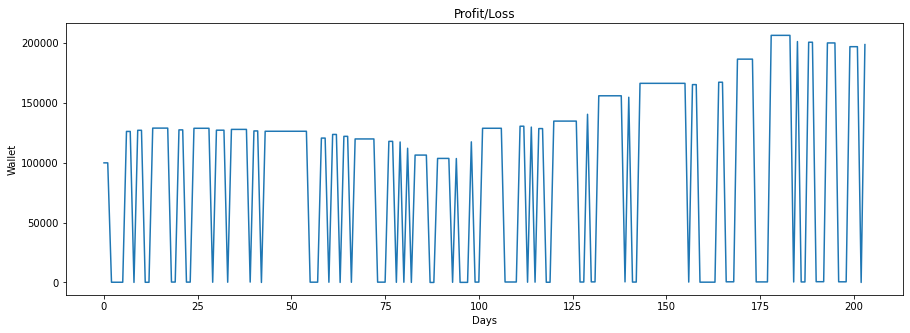

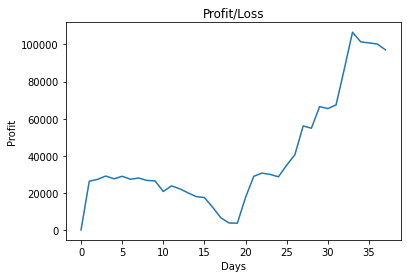

In [259]:
model4(ABOT,100000,100)

###Investing on 50% of Wallet

Initial Wallet =  100000
Percentage Profit =  69.61824400000005
Final Wallet =  169618.24400000004


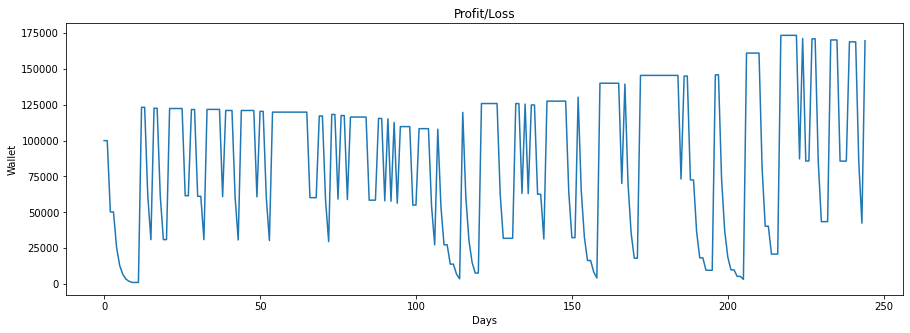

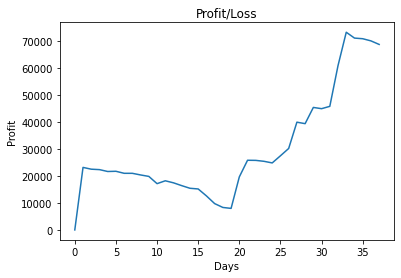

In [267]:
model4(ABOT,100000,50)

Initial Wallet =  100000
Percentage Profit =  35.90977440000005
Final Wallet =  135909.77440000005


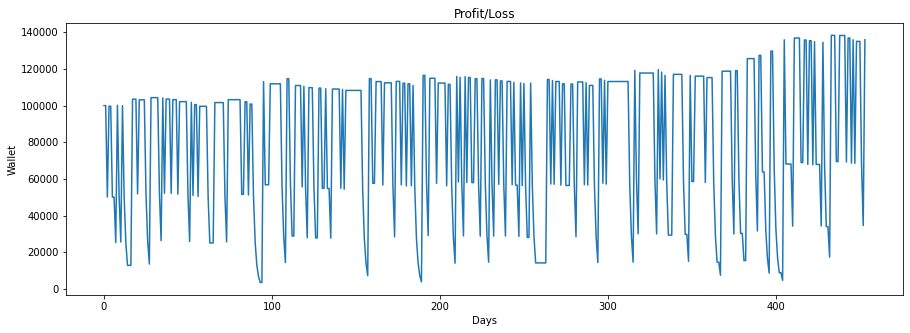

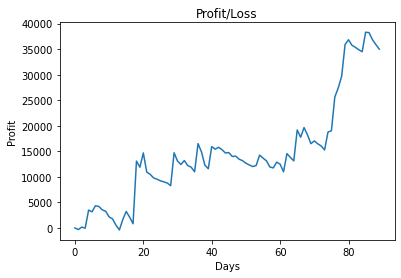

In [268]:
model4(LUCK,100000,50)

Initial Wallet =  100000
Percentage Profit =  -1.539020000000004
Final Wallet =  98460.98


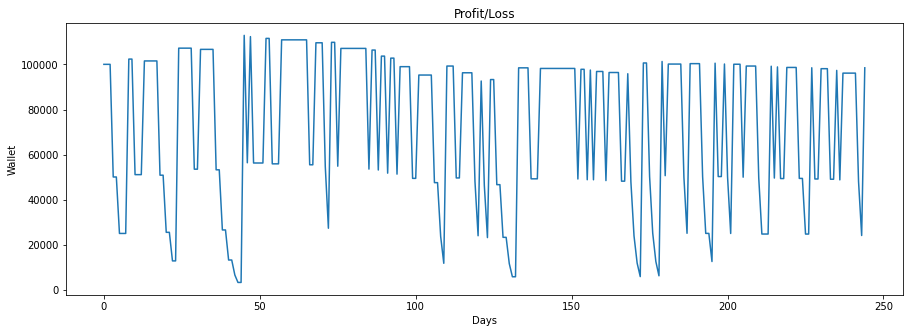

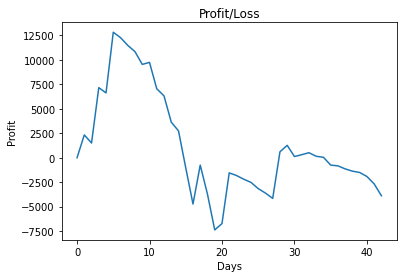

In [269]:
model4(PSO,100000,50)

Initial Wallet =  100000
Percentage Profit =  14.20190240000008
Final Wallet =  114201.90240000008


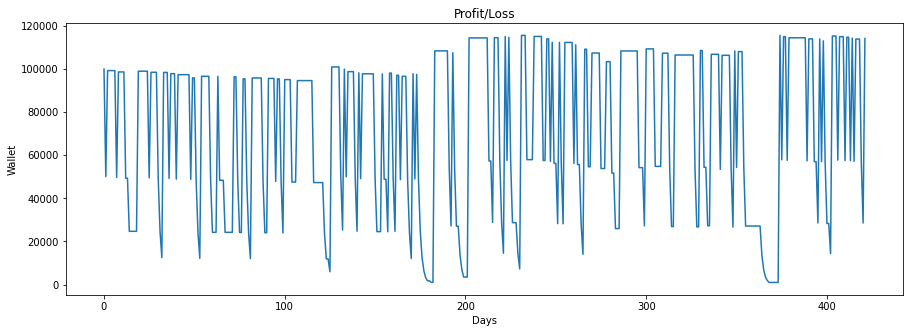

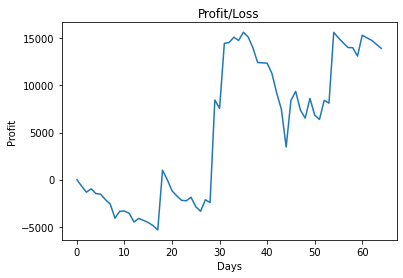

In [270]:
model4(MCB,100000,50)

Initial Wallet =  100000
Percentage Profit =  30.19130109999995
Final Wallet =  130191.30109999995


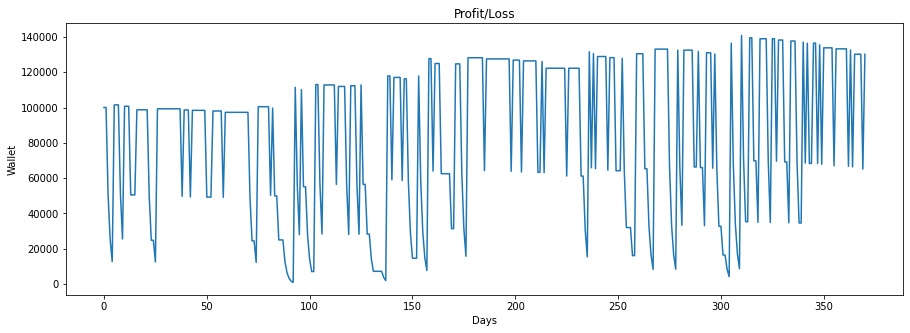

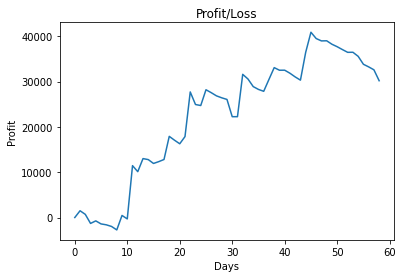

In [272]:
model4(PPL,100000,50)

### List of Percentage Profits

In [275]:
profit_list

[69.61824400000005,
 35.90977440000005,
 -1.539020000000004,
 14.20190240000008,
 30.19130109999995]

### Average Percentage Profit

In [276]:
statistics.mean(profit_list)

29.676440380000024